In [217]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [218]:
items = pd.read_csv("data/items.csv")
items_categories = pd.read_csv("data/item_categories.csv")
sales_train = pd.read_csv("data/sales_train.csv")
shops = pd.read_csv("data/shops.csv")

df_init = pd.merge(items, items_categories, on="item_category_id", how="inner")
df_init = pd.merge(df_init, sales_train, on="item_id", how="inner")
df_init.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


## DELETE OUTLIERS

In [219]:
df_init["item_cnt_day"].value_counts()

 1.0       2629372
 2.0        194201
 3.0         47350
 4.0         19685
 5.0         10474
-1.0          7252
 6.0          6338
 7.0          4057
 8.0          2903
 9.0          2177
 10.0         1820
 11.0         1263
 12.0         1083
 13.0          918
 14.0          716
 15.0          638
 16.0          544
 17.0          438
 18.0          391
 20.0          364
 19.0          347
 21.0          290
 22.0          242
 24.0          204
 23.0          198
 25.0          180
 26.0          176
 30.0          147
 28.0          131
 27.0          130
 31.0          123
 32.0          106
 29.0          102
 33.0           82
 34.0           81
-2.0            78
 35.0           69
 36.0           62
 37.0           61
 41.0           58
 40.0           58
 38.0           54
 39.0           52
 44.0           40
 46.0           39
 42.0           36
 43.0           34
 50.0           33
 45.0           31
 47.0           25
 49.0           25
 48.0           22
 52.0       

### Take 99th percentile of sells in a day

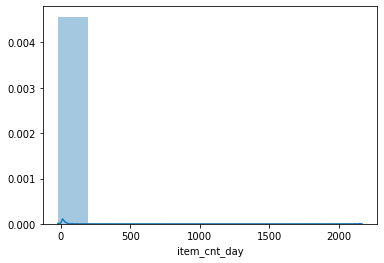

In [220]:
g = sns.distplot(a = df_init["item_cnt_day"], bins=10)

In [221]:
print(len(df_init))
df_init = df_init[df_init["item_cnt_day"] <= np.percentile(a=df_init["item_cnt_day"], q=99)]
print(len(df_init))
df_init.head()

2935849
2908438


,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


### Delete negative item_cnt_day -> Devolutions

In [222]:
(df_init["item_cnt_day"] < 0).sum()

7356

In [223]:
print(len(df_init))
df_init = df_init[df_init["item_cnt_day"] > 0]
print(len(df_init))
df_init.head()

2908438
2901082


,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


## DEFINE FEATURES PARAMETERS

In [224]:
month_to_predict = 30
max_train_month = 29
features_folder_name = "features_train_4/"

In [225]:
df = df_init[df_init["date_block_num"] < month_to_predict]
assert(df["date_block_num"].max() == max_train_month)
print("Maximum month in features after processing will be:", df.date_block_num.value_counts().index.max())
df.head()

Maximum month in features after processing will be: 29


,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


## FEATURES

### Of categories and shops (shop_id & item_category_id)

#### Items sold from the same categorie in the same shop last month

In [226]:
items_same_cat_and_shop = df[df.date_block_num == max_train_month].groupby(["shop_id", "item_category_id"]).agg({"item_cnt_day":"sum"}).reset_index().rename(columns={"item_cnt_day":"sold_cat_last_month_by_shop"})
items_same_cat_and_shop.head()

categories_and_shops = items_same_cat_and_shop
print(len(categories_and_shops))

print(categories_and_shops["sold_cat_last_month_by_shop"].isna().sum())
categories_and_shops.sample(10)

1792
0


,shop_id,item_category_id,sold_cat_last_month_by_shop
216,7,22,17.0
270,10,63,9.0
747,26,70,23.0
1476,50,64,7.0
1547,52,43,8.0
311,12,61,26.0
1097,39,70,13.0
458,18,21,5.0
1369,48,20,50.0
188,6,57,3.0


#### Items sold from the same categorie in the same shop historically by month (mean, sum, std, min, max)

In [227]:
items_same_cat_and_shop = df.groupby(["shop_id", "item_category_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()

In [228]:
items_same_cat_and_shop.head()

,shop_id,item_category_id,date_block_num,item_cnt_day
0,0,0,1,1.0
1,0,1,1,1.0
2,0,2,0,53.0
3,0,2,1,52.0
4,0,3,0,28.0


In [229]:
items_same_cat_and_shop_h = items_same_cat_and_shop.groupby(["shop_id", "item_category_id"]).agg({"item_cnt_day":["sum", "mean", "std", "min", "max"]}).reset_index()

items_same_cat_and_shop_h.columns = ['_'.join(col).strip() for col in items_same_cat_and_shop_h.columns.values]

items_same_cat_and_shop_h.rename(columns={
   "shop_id_":"shop_id",
    "item_category_id_":"item_category_id",
    "item_cnt_day_sum":"hist_sales_sum_cat_by_shop",
    "item_cnt_day_mean":"hist_sales_mean_cat_by_shop",
    "item_cnt_day_std":"hist_sales_std_cat_by_shop",
    "item_cnt_day_min":"hist_sales_min_cat_by_shop",
    "item_cnt_day_max":"hist_sales_max_cat_by_shop"
}, inplace=True)

print(len(categories_and_shops))
print(len(items_same_cat_and_shop_h))
categories_and_shops = pd.merge(items_same_cat_and_shop_h, categories_and_shops, on=["shop_id", "item_category_id"], how="left")
print(len(categories_and_shops))
categories_and_shops.head()

1792
3204
3204


,shop_id,item_category_id,hist_sales_sum_cat_by_shop,hist_sales_mean_cat_by_shop,hist_sales_std_cat_by_shop,hist_sales_min_cat_by_shop,hist_sales_max_cat_by_shop,sold_cat_last_month_by_shop
0,0,0,1.0,1.0,NaN,1.0,1.0,NaN
1,0,1,1.0,1.0,NaN,1.0,1.0,NaN
2,0,2,105.0,52.5,0.707107,52.0,53.0,NaN
3,0,3,52.0,26.0,2.828427,24.0,28.0,NaN
4,0,4,38.0,19.0,4.242641,16.0,22.0,NaN


In [230]:
categories_and_shops.to_csv("generated/" + features_folder_name + "features_shop_and_categories.csv", index=False)

### Of categories (category_id)

#### Total shops that sell items with that category

In [231]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [232]:
categories_features = df.groupby("item_category_id").agg({"shop_id":"nunique"}).reset_index().rename(columns={"shop_id":"total_shops_of_category"})
print(len(items_categories))
print(len(categories_features))
categories_features.sample(10)

84
83


,item_category_id,total_shops_of_category
16,16,49
50,51,1
12,12,52
57,58,53
27,27,1
24,24,51
43,44,1
67,68,3
61,62,57
0,0,3


#### Total items by category

In [233]:
items_by_category = df.groupby("item_category_id").agg({"item_id":"nunique"}).reset_index().rename(columns={"item_id":"total_items_of_category"})
items_by_category.sample(7)

,item_category_id,total_items_of_category
20,20,121
12,12,9
7,7,19
47,48,5
67,68,27
59,60,51
45,46,12


In [234]:
print(len(categories_features))
categories_features = pd.merge(categories_features, items_by_category, on="item_category_id", how="inner")
print(len(categories_features))
categories_features.sample(7)

83
83


,item_category_id,total_shops_of_category,total_items_of_category
41,42,43,5
46,47,28,21
63,64,57,248
30,30,57,744
55,56,55,382
68,69,58,289
27,27,1,6


#### Historical mean sales of category by month

In [235]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [236]:
sum_sales_of_category = df.groupby(["item_category_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()
mean_sales_of_category = df.groupby("item_category_id").agg({"item_cnt_day":"mean"}).reset_index().rename(columns={"item_cnt_day":"mean_sales_of_category_by_month"})
categories_features = pd.merge(categories_features, mean_sales_of_category)
categories_features.sample(10)

,item_category_id,total_shops_of_category,total_items_of_category,mean_sales_of_category_by_month
49,50,1,2,1.500000
44,45,47,156,1.005274
67,68,3,27,1.048780
0,0,3,3,1.000000
55,56,55,382,1.040139
2,2,54,75,1.072296
38,39,42,7,1.035256
58,59,48,294,1.004239
11,11,54,39,1.061286
71,72,58,567,1.079056


In [237]:
categories_features.to_csv("generated/" + features_folder_name + "features_categories.csv", index=False)

### Of shops (shop_id)

#### Total categories by shop

In [238]:
t_cat_by_shop = df.groupby("shop_id").agg({"item_category_id":"nunique"}).reset_index().rename(columns={"item_category_id":"tot_cat_by_shops"})
t_cat_by_shop.head()

print(len(shops))
shops_features = t_cat_by_shop
print(len(shops_features))
shops_features.sample(10)

60
59


,shop_id,tot_cat_by_shops
1,1,41
47,48,51
53,54,59
16,16,62
15,15,59
37,38,61
36,37,62
4,4,60
42,43,57
33,33,47


#### Number of items sold by shop in the last month

In [239]:
items_sold_last_month = df[df["date_block_num"] == max_train_month].groupby("shop_id").agg({"item_cnt_day":"sum"}).reset_index().rename(columns={"item_cnt_day":"items_sold_last_month"})

shops_features = pd.merge(shops_features, items_sold_last_month, on="shop_id", how="left")
print(shops_features["items_sold_last_month"].isna().sum())
shops_features["items_sold_last_month"] = shops_features["items_sold_last_month"].fillna(0) 
print(len(shops_features))
shops_features.sample(5)

16
59


,shop_id,tot_cat_by_shops,items_sold_last_month
5,5,58,940.0
11,11,35,0.0
39,40,26,0.0
16,16,62,1021.0
19,19,60,1279.0


#### Number of items sold by shop in last n months

In [240]:
months = [max_train_month - 1 - i for i in range(12)]
months

[28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]

In [241]:
print(len(shops_features))
for month in months:
    items_sold_in_month = df[df["date_block_num"] == month].groupby("shop_id").agg({"item_cnt_day":"sum"}).reset_index().\
    rename(columns={"item_cnt_day":"items_sold_by_shop_last_" + str(month_to_predict - month) + "_months"})
    shops_features = pd.merge(shops_features, items_sold_in_month, on="shop_id", how="left")
    print(len(shops_features))
shops_features.sample(10)

59
59
59
59
59
59
59
59
59
59
59
59
59


,shop_id,tot_cat_by_shops,items_sold_last_month,items_sold_by_shop_last_2_months,items_sold_by_shop_last_3_months,items_sold_by_shop_last_4_months,items_sold_by_shop_last_5_months,items_sold_by_shop_last_6_months,items_sold_by_shop_last_7_months,items_sold_by_shop_last_8_months,items_sold_by_shop_last_9_months,items_sold_by_shop_last_10_months,items_sold_by_shop_last_11_months,items_sold_by_shop_last_12_months,items_sold_by_shop_last_13_months
9,9,35,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2390.0,NaN,NaN,NaN,NaN
44,45,59,619.0,703.0,729.0,730.0,783.0,943.0,1487.0,1115.0,841.0,869.0,1130.0,1118.0,1225.0
33,33,47,0.0,NaN,NaN,496.0,781.0,993.0,1017.0,812.0,602.0,580.0,125.0,NaN,NaN
0,0,48,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,44,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,41,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,56,431.0,394.0,496.0,538.0,NaN,586.0,1029.0,688.0,599.0,686.0,625.0,528.0,569.0
8,8,43,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,48,51,980.0,1028.0,994.0,1162.0,1100.0,1387.0,2237.0,1381.0,1267.0,1157.0,1607.0,1402.0,1334.0
7,7,60,1229.0,1100.0,1189.0,1398.0,1750.0,1975.0,3077.0,1878.0,1582.0,1578.0,1931.0,1668.0,1852.0


In [242]:
shops_features.to_csv("generated/" + features_folder_name +"features_shops.csv", index=False)

### By item in specific shop (item_id & shop_id)

#### Items sold in shop last month

In [243]:
item_purchases_by_shop_last_month = df[df["date_block_num"] == max_train_month].groupby(["shop_id", "item_id"]).agg({"item_cnt_day":"sum"}).reset_index().rename(columns={"item_cnt_day":"purchases_item_in_shop_last_month"})

features_items_and_shops = item_purchases_by_shop_last_month

features_items_and_shops.sample(10)

,shop_id,item_id,purchases_item_in_shop_last_month
19297,38,10216,3.0
19994,41,2696,1.0
7244,19,6004,1.0
31368,59,1556,2.0
22113,44,14957,1.0
9800,25,1858,1.0
6127,16,13542,1.0
18734,37,11253,1.0
2655,6,15240,1.0
17586,34,6537,1.0


#### Item sold in shop in last n months

In [244]:
months = [max_train_month - 1 - i for i in range(15)]
months

[28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14]

In [245]:
for month in months:
    print(len(features_items_and_shops))
    item_purchases_by_shop_in_month = df[df["date_block_num"] == month].groupby(["shop_id", "item_id"]).agg({"item_cnt_day":"sum"}).reset_index().rename(columns={"item_cnt_day":"purchases_item_in_shop_month_" + str(month_to_predict - month)})
    features_items_and_shops = pd.merge(features_items_and_shops, item_purchases_by_shop_in_month, on=["shop_id", "item_id"], how="outer")
    print(len(features_items_and_shops))

31886
50531
50531
65348
65348
82314
82314
96516
96516
111608
111608
129163
129163
140188
140188
151080
151080
160519
160519
171741
171741
182538
182538
193258
193258
203517
203517
213401
213401
224734


In [246]:
features_items_and_shops.head()

,shop_id,item_id,purchases_item_in_shop_last_month,purchases_item_in_shop_month_2,purchases_item_in_shop_month_3,purchases_item_in_shop_month_4,purchases_item_in_shop_month_5,purchases_item_in_shop_month_6,purchases_item_in_shop_month_7,purchases_item_in_shop_month_8,purchases_item_in_shop_month_9,purchases_item_in_shop_month_10,purchases_item_in_shop_month_11,purchases_item_in_shop_month_12,purchases_item_in_shop_month_13,purchases_item_in_shop_month_14,purchases_item_in_shop_month_15,purchases_item_in_shop_month_16
0,2,486,2.0,NaN,1.0,2.0,3.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,792,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN
2,2,949,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,3.0,2.0,1.0,2.0,NaN,NaN
3,2,950,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,1.0,1.0,NaN
4,2,1090,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Historical sales for shop in specific item (sum, mean, std, min, max)

In [247]:
sales_of_item_in_shop_by_month = df.groupby(["item_id", "shop_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()
# careful: only considering months that have al least one purchase.
sales_of_item_in_shop_by_month_h = sales_of_item_in_shop_by_month.groupby(["item_id", "shop_id"]).agg({"item_cnt_day": ["mean", "sum", "std", "max", "min"]}).reset_index().rename(columns={"sales_in_month":"average_sales_for_item_and_shop_by_month"})

sales_of_item_in_shop_by_month_h.columns = ['_'.join(col).strip() for col in sales_of_item_in_shop_by_month_h.columns.values]

sales_of_item_in_shop_by_month_h.rename(columns={
   "shop_id_":"shop_id",
    "item_id_":"item_id",
    "item_cnt_day_sum":"hist_sales_sum_item_by_shop",
    "item_cnt_day_mean":"hist_sales_mean_item_by_shop",
    "item_cnt_day_std":"hist_sales_std_item_by_shop",
    "item_cnt_day_min":"hist_sales_min_item_by_shop",
    "item_cnt_day_max":"hist_sales_max_item_by_shop"
}, inplace=True)

print(len(features_items_and_shops))
print(len(sales_of_item_in_shop_by_month_h))
features_items_and_shops = pd.merge(sales_of_item_in_shop_by_month_h, features_items_and_shops, on=["shop_id", "item_id"],how="left")
print(len(features_items_and_shops))

features_items_and_shops.sample(10)

224734
401401
401401


,item_id,shop_id,hist_sales_mean_item_by_shop,hist_sales_sum_item_by_shop,hist_sales_std_item_by_shop,hist_sales_max_item_by_shop,hist_sales_min_item_by_shop,purchases_item_in_shop_last_month,purchases_item_in_shop_month_2,purchases_item_in_shop_month_3,purchases_item_in_shop_month_4,purchases_item_in_shop_month_5,purchases_item_in_shop_month_6,purchases_item_in_shop_month_7,purchases_item_in_shop_month_8,purchases_item_in_shop_month_9,purchases_item_in_shop_month_10,purchases_item_in_shop_month_11,purchases_item_in_shop_month_12,purchases_item_in_shop_month_13,purchases_item_in_shop_month_14,purchases_item_in_shop_month_15,purchases_item_in_shop_month_16
351170,19158,51,1.000000,3.0,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90521,5639,41,1.142857,8.0,0.377964,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0
128580,7794,28,2.200000,11.0,1.095445,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,4.0,2.0,NaN,NaN
286726,16026,50,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153028,8991,21,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33179,2469,18,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47964,3243,27,4.000000,20.0,4.527693,12.0,1.0,2.0,1.0,3.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369695,20151,54,1.600000,16.0,0.966092,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
88840,5592,42,2.083333,25.0,1.311372,5.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252042,14299,26,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Last ten months sales for shop in specific item (sum, mean, std, min, max) 

In [248]:
sales_of_item_in_shop_by_month_10 = df[df.date_block_num >= max_train_month - 10].groupby(["item_id", "shop_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()
# careful: only considering months that have al least one purchase.
sales_of_item_in_shop_by_month_h_10 = sales_of_item_in_shop_by_month_10.groupby(["item_id", "shop_id"]).agg({"item_cnt_day": ["mean", "sum", "std", "max", "min"]}).reset_index().rename(columns={"sales_in_month":"average_sales_for_item_and_shop_by_month"})

sales_of_item_in_shop_by_month_h_10.columns = ['_'.join(col).strip() for col in sales_of_item_in_shop_by_month_h_10.columns.values]

sales_of_item_in_shop_by_month_h_10.rename(columns={
   "shop_id_":"shop_id",
    "item_id_":"item_id",
    "item_cnt_day_sum":"ten_month_sales_sum_item_by_shop",
    "item_cnt_day_mean":"ten_month_mean_item_by_shop",
    "item_cnt_day_std":"ten_month_std_item_by_shop",
    "item_cnt_day_min":"ten_month_min_item_by_shop",
    "item_cnt_day_max":"ten_month_max_item_by_shop"
}, inplace=True)

print(len(features_items_and_shops))
print(len(sales_of_item_in_shop_by_month_h_10))
features_items_and_shops = pd.merge(sales_of_item_in_shop_by_month_h_10, features_items_and_shops, on=["shop_id", "item_id"],how="left")
print(len(features_items_and_shops))

features_items_and_shops.sample(10)

401401
171741
171741


,item_id,shop_id,ten_month_mean_item_by_shop,ten_month_sales_sum_item_by_shop,ten_month_std_item_by_shop,ten_month_max_item_by_shop,ten_month_min_item_by_shop,hist_sales_mean_item_by_shop,hist_sales_sum_item_by_shop,hist_sales_std_item_by_shop,hist_sales_max_item_by_shop,hist_sales_min_item_by_shop,purchases_item_in_shop_last_month,purchases_item_in_shop_month_2,purchases_item_in_shop_month_3,purchases_item_in_shop_month_4,purchases_item_in_shop_month_5,purchases_item_in_shop_month_6,purchases_item_in_shop_month_7,purchases_item_in_shop_month_8,purchases_item_in_shop_month_9,purchases_item_in_shop_month_10,purchases_item_in_shop_month_11,purchases_item_in_shop_month_12,purchases_item_in_shop_month_13,purchases_item_in_shop_month_14,purchases_item_in_shop_month_15,purchases_item_in_shop_month_16
121832,15740,35,1.000000,7.0,0.000000,1.0,1.0,1.000000,16.0,0.000000,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN
125719,16111,6,1.000000,3.0,0.000000,1.0,1.0,1.000000,7.0,0.000000,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
169382,21874,31,2.444444,22.0,1.740051,5.0,1.0,4.500000,90.0,5.052357,21.0,1.0,NaN,1.0,NaN,5.0,1.0,1.0,2.0,4.0,2.0,5.0,1.0,1.0,3.0,3.0,1.0,2.0
11782,2104,37,1.000000,1.0,NaN,1.0,1.0,1.300000,13.0,0.483046,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
55309,7053,46,2.000000,2.0,NaN,2.0,2.0,1.250000,5.0,0.500000,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
5443,1364,12,1.333333,4.0,0.577350,2.0,1.0,2.000000,12.0,1.549193,5.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,5.0,NaN
21844,3158,10,1.250000,5.0,0.500000,2.0,1.0,1.090909,12.0,0.301511,2.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
20758,3027,4,3.500000,21.0,3.016621,8.0,1.0,3.500000,21.0,3.016621,8.0,1.0,1.0,NaN,1.0,NaN,1.0,4.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63439,8079,28,3.333333,10.0,0.577350,4.0,3.0,3.333333,10.0,0.577350,4.0,3.0,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158916,20368,6,1.000000,2.0,0.000000,1.0,1.0,1.000000,2.0,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Time since last and first purchase of item in shop

In [249]:
with_last_purchase_month = df.groupby(["item_id", "shop_id"]).agg({"date_block_num":"max"}).reset_index().rename(columns={"date_block_num":"month_last_purchase_of_item_in_shop"})
with_first_purchase_month = df.groupby(["item_id", "shop_id"]).agg({"date_block_num":"min"}).reset_index().rename(columns={"date_block_num":"month_first_purchase_of_item_in_shop"})

print(len(features_items_and_shops))
features_items_and_shops = pd.merge(features_items_and_shops, with_last_purchase_month, on=["shop_id", "item_id"], how="inner")
features_items_and_shops = pd.merge(features_items_and_shops, with_first_purchase_month, on=["shop_id", "item_id"], how="inner")
print(len(features_items_and_shops))
features_items_and_shops.sample(10)

171741
171741


,item_id,shop_id,ten_month_mean_item_by_shop,ten_month_sales_sum_item_by_shop,ten_month_std_item_by_shop,ten_month_max_item_by_shop,ten_month_min_item_by_shop,hist_sales_mean_item_by_shop,hist_sales_sum_item_by_shop,hist_sales_std_item_by_shop,hist_sales_max_item_by_shop,hist_sales_min_item_by_shop,purchases_item_in_shop_last_month,purchases_item_in_shop_month_2,purchases_item_in_shop_month_3,purchases_item_in_shop_month_4,purchases_item_in_shop_month_5,purchases_item_in_shop_month_6,purchases_item_in_shop_month_7,purchases_item_in_shop_month_8,purchases_item_in_shop_month_9,purchases_item_in_shop_month_10,purchases_item_in_shop_month_11,purchases_item_in_shop_month_12,purchases_item_in_shop_month_13,purchases_item_in_shop_month_14,purchases_item_in_shop_month_15,purchases_item_in_shop_month_16,month_last_purchase_of_item_in_shop,month_first_purchase_of_item_in_shop
154793,19789,16,1.0,3.0,0.000000,1.0,1.0,1.166667,7.0,0.408248,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,23,1
31585,4251,7,1.5,6.0,0.577350,2.0,1.0,2.529412,43.0,1.699913,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,23,0
135087,17167,43,1.0,5.0,0.000000,1.0,1.0,1.000000,5.0,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,24,19
167990,21711,35,1.2,6.0,0.447214,2.0,1.0,1.083333,13.0,0.288675,2.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,29,1
64177,8190,19,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,26
2342,952,58,2.0,2.0,NaN,2.0,2.0,2.000000,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,29
125477,16086,35,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,23
16313,2703,10,1.0,2.0,0.000000,1.0,1.0,1.076923,14.0,0.277350,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,26,0
62605,7983,59,2.0,4.0,1.414214,3.0,1.0,2.000000,4.0,1.414214,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,22
112048,14733,33,1.0,1.0,NaN,1.0,1.0,1.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25


#### Number of months in there was a sell of item in shop

In [250]:
total_months_with_sells = df.groupby(["item_id", "shop_id"]).agg({"date_block_num":"nunique"}).reset_index().rename(columns={"date_block_num":"total_months_with_sells_by_item_and_shop"})
total_months_with_sells.sample(7)

,item_id,shop_id,total_months_with_sells_by_item_and_shop
285727,15984,16,4
214616,12278,50,5
92243,5745,47,2
168393,9965,28,4
136252,8097,30,4
40709,2859,18,6
333800,18407,30,1


In [251]:
print(len(features_items_and_shops))
features_items_and_shops = pd.merge(features_items_and_shops, total_months_with_sells, on=["item_id", "shop_id"], how="inner")
print(len(features_items_and_shops))
features_items_and_shops.sample(7)

171741
171741


,item_id,shop_id,ten_month_mean_item_by_shop,ten_month_sales_sum_item_by_shop,ten_month_std_item_by_shop,ten_month_max_item_by_shop,ten_month_min_item_by_shop,hist_sales_mean_item_by_shop,hist_sales_sum_item_by_shop,hist_sales_std_item_by_shop,hist_sales_max_item_by_shop,hist_sales_min_item_by_shop,purchases_item_in_shop_last_month,purchases_item_in_shop_month_2,purchases_item_in_shop_month_3,purchases_item_in_shop_month_4,purchases_item_in_shop_month_5,purchases_item_in_shop_month_6,purchases_item_in_shop_month_7,purchases_item_in_shop_month_8,purchases_item_in_shop_month_9,purchases_item_in_shop_month_10,purchases_item_in_shop_month_11,purchases_item_in_shop_month_12,purchases_item_in_shop_month_13,purchases_item_in_shop_month_14,purchases_item_in_shop_month_15,purchases_item_in_shop_month_16,month_last_purchase_of_item_in_shop,month_first_purchase_of_item_in_shop,total_months_with_sells_by_item_and_shop
23351,3332,3,1.333333,8.0,0.816497,3.0,1.0,1.300000,13.0,0.674949,3.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,25,9,10
120109,15504,33,1.500000,3.0,0.707107,2.0,1.0,1.500000,3.0,0.707107,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,23,2
105823,13894,48,1.000000,4.0,0.000000,1.0,1.0,1.000000,6.0,0.000000,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,27,17,6
100261,13184,21,1.000000,2.0,0.000000,1.0,1.0,1.000000,3.0,0.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29,14,3
114533,15104,28,1.000000,4.0,0.000000,1.0,1.0,1.307692,17.0,0.480384,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,NaN,2.0,24,0,13
119964,15493,57,1.000000,1.0,NaN,1.0,1.0,1.000000,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,29,1
130626,16558,21,1.000000,1.0,NaN,1.0,1.0,1.000000,4.0,0.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,19,7,4


In [252]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [253]:
features_items_and_shops.to_csv("generated/" + features_folder_name + "features_items_and_shop.csv", index=False)

### Of items (item_id)

#### Max, mean, std, and min item price

In [254]:
with_price_features = df.groupby("item_id").agg({"item_price":["max", "mean", "min", "std"]}).reset_index()
with_price_features.columns = ['_'.join(col).strip() for col in with_price_features.columns.values]
with_price_features["diff_price_max_min"] = with_price_features["item_price_max"] - with_price_features["item_price_min"]
with_price_features.rename(columns={"item_id_":"item_id"}, inplace=True)

items_features = with_price_features

items_features.sample(7)

,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min
17133,18456,229.0,225.629630,140.00,16.871781,89.00
10683,11479,249.0,249.000000,249.00,0.000000,0.00
1741,1952,498.0,498.000000,498.00,NaN,0.00
14124,15283,1769.0,1526.395905,680.12,145.529077,1088.88
19650,21229,974.0,974.000000,974.00,NaN,0.00
102,103,12900.0,12900.000000,12900.00,NaN,0.00
14566,15765,149.0,136.659091,77.00,25.076574,72.00


#### Total shops that sell specific item

In [255]:
with_different_shops = df.groupby("item_id").agg({"shop_id":"nunique"}).reset_index().rename(columns={"shop_id":"total_shops_item_is_sell"})

print(len(items_features))
items_features = pd.merge(items_features, with_different_shops, on="item_id", how="inner")
print(len(items_features))

items_features.sample(10)

20533
20533


,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min,total_shops_item_is_sell
20193,21789,27.0,27.000000,27.0,NaN,0.0,1
600,721,188.0,188.000000,188.0,NaN,0.0,1
277,344,216.0,216.000000,216.0,0.000000,0.0,1
8803,9523,148.0,118.000000,58.0,46.475800,90.0,5
9148,9876,199.0,198.537736,150.0,4.759301,49.0,35
7205,7799,3699.0,3502.401460,2398.0,332.112323,1301.0,44
18745,20136,349.0,344.891532,226.0,21.850833,123.0,34
14537,15736,149.0,135.090909,58.0,31.042075,91.0,12
8675,9385,319.0,235.821918,198.0,23.251250,121.0,22
19753,21333,99.0,93.436957,58.0,14.070781,41.0,17


#### Mean sales of item historically by month

In [256]:
items_sells_historically = df.groupby(["item_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()
mean_items_sells = items_sells_historically.groupby("item_id").agg({"item_cnt_day":"mean"}).reset_index().rename(columns={"item_cnt_day":"sales_item_historically_mean"})
items_features = pd.merge(items_features, mean_items_sells, on="item_id", how="inner")
items_features.sample(10)

,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min,total_shops_item_is_sell,sales_item_historically_mean
14333,15519,299.0,289.045458,146.59,36.330018,152.41,49,37.086957
17459,18796,399.0,348.317500,149.00,99.554081,250.00,30,15.714286
11432,12273,549.0,534.815161,288.00,58.436378,261.00,34,7.900000
1189,1347,419.3,359.400000,299.50,84.711392,119.80,1,1.000000
3893,4254,499.0,376.500000,174.00,135.631240,325.00,1,1.428571
10961,11787,149.0,122.333929,69.00,34.618030,80.00,31,6.588235
16819,18132,249.0,249.000000,249.00,0.000000,0.00,2,1.000000
12310,13205,299.0,296.751786,168.00,16.684942,131.00,47,58.181818
16142,17421,169.0,155.140603,69.31,15.775182,99.69,24,17.714286
8534,9221,299.0,299.000000,299.00,0.000000,0.00,11,2.333333


#### Mean of item sales last ten months

In [257]:
items_sells_historically_10 = df[df.date_block_num >= max_train_month - 10].groupby(["item_id", "date_block_num"]).agg({"item_cnt_day":"sum"}).reset_index()
mean_items_sells_10 = items_sells_historically_10.groupby("item_id").agg({"item_cnt_day":"mean"}).reset_index().rename(columns={"item_cnt_day":"sales_item_mean_ten"})
items_features = pd.merge(items_features, mean_items_sells_10, on="item_id", how="inner")
items_features.sample(10)

,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min,total_shops_item_is_sell,sales_item_historically_mean,sales_item_mean_ten
6251,11350,249.0,242.669022,154.00,23.584667,95.00,23,4.842105,1.000000
10956,20033,399.0,398.704861,379.05,2.350669,19.95,23,12.333333,12.333333
5234,9599,199.0,199.000000,199.00,0.000000,0.00,2,2.000000,2.000000
6531,11918,529.0,246.596852,65.00,106.032286,464.00,26,3.176471,1.000000
7032,12917,249.0,245.988985,145.95,15.776198,103.05,51,13.700000,15.363636
8360,15460,449.0,448.968421,448.70,0.094591,0.30,7,1.900000,1.000000
3342,6003,399.0,390.666667,299.00,28.867513,100.00,11,12.000000,12.000000
9798,17970,399.0,399.000000,399.00,0.000000,0.00,21,12.000000,12.000000
10260,18815,149.0,111.888889,49.00,40.359818,100.00,25,3.500000,2.666667
1647,2936,1199.0,1199.000000,1199.00,0.000000,0.00,14,18.000000,18.000000


#### Number of months where item has sales

In [258]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [259]:
months_of_sales_by_item = df.groupby("item_id").agg({"date_block_num":"nunique"}).reset_index().rename(columns={"date_block_num":"months_item_has_sales"})
items_features = pd.merge(items_features, months_of_sales_by_item, on="item_id", how="inner")
items_features.sample(10)

,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min,total_shops_item_is_sell,sales_item_historically_mean,sales_item_mean_ten,months_item_has_sales
1049,1915,249.0,244.133924,49.0,20.904738,200.0,55,78.633333,33.545455,30
6447,11732,399.0,368.849164,28.0,88.431220,371.0,45,25.500000,1.750000,16
5552,10211,3499.0,3490.892555,2867.0,61.070701,632.0,41,128.000000,128.000000,2
9984,18298,199.0,174.662587,28.0,50.880941,171.0,43,28.523810,2.600000,21
2554,4596,999.0,999.000000,999.0,0.000000,0.0,2,1.000000,1.000000,3
11918,21843,2099.0,1145.912621,799.0,270.314381,1300.0,33,3.678571,2.111111,28
1290,2354,999.0,860.014715,398.0,223.297127,601.0,48,23.882353,7.727273,17
1963,3458,2599.0,2599.000000,2599.0,NaN,0.0,1,1.000000,1.000000,1
7953,14721,299.0,292.051402,200.0,24.812856,99.0,32,11.000000,1.000000,10
6936,12735,549.0,431.283107,133.0,166.466212,416.0,47,24.526316,3.000000,19


#### Total times item is sell in one unit, two units, etc..

In [260]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0


In [261]:
count_items = df["item_cnt_day"].value_counts()

In [262]:
max_units = int(count_items.index.max())
max_units

5

In [263]:
print(len(items_features))
df_aux = df.copy()
for x in range(1, max_units + 1):
    df_aux["total_sales_with_" + str(x) + "_units"] = 1
    counting = df_aux[df_aux.item_cnt_day == x].groupby("item_id").agg({"total_sales_with_" + str(x) + "_units":"sum"}).reset_index()
    items_features = pd.merge(items_features, counting, on="item_id", how="left")
print(len(items_features))
items_features.sample(10)

12079
12079


,item_id,item_price_max,item_price_mean,item_price_min,item_price_std,diff_price_max_min,total_shops_item_is_sell,sales_item_historically_mean,sales_item_mean_ten,months_item_has_sales,total_sales_with_1_units,total_sales_with_2_units,total_sales_with_3_units,total_sales_with_4_units,total_sales_with_5_units
9046,16542,249.0,246.967722,175.0,11.757823,74.0,31,6.583333,5.636364,12,79.0,NaN,NaN,NaN,NaN
2284,4111,1499.0,1251.322581,298.0,340.540784,1201.0,10,1.823529,1.333333,17,31.0,NaN,NaN,NaN,NaN
4378,7953,2690.0,2197.473687,1095.0,289.524404,1595.0,46,7.692308,6.714286,26,196.0,2.0,NaN,NaN,NaN
8089,15036,390.0,388.252033,302.0,12.173637,88.0,33,12.217391,2.000000,23,220.0,18.0,7.0,1.0,NaN
4573,8292,349.0,275.774783,25.0,104.802394,324.0,33,5.043478,2.555556,23,114.0,1.0,NaN,NaN,NaN
9473,17335,399.0,397.000000,255.0,16.911121,144.0,35,88.000000,88.000000,2,117.0,22.0,5.0,NaN,NaN
2045,3636,499.0,499.000000,499.0,0.000000,0.0,1,3.000000,2.000000,2,6.0,NaN,NaN,NaN,NaN
8197,15179,2079.0,2079.000000,2079.0,0.000000,0.0,3,1.666667,1.666667,3,5.0,NaN,NaN,NaN,NaN
7181,13262,499.0,495.868750,398.8,17.713025,100.2,12,8.250000,8.250000,4,31.0,1.0,NaN,NaN,NaN
1096,2016,29.0,19.900000,15.0,6.851047,14.0,1,2.333333,1.000000,9,19.0,1.0,NaN,NaN,NaN


In [264]:
f = df.groupby("item_id").agg({"item_cnt_day":"count"}).reset_index()
f.sample(10)

,item_id,item_cnt_day
10401,11188,92
9339,10080,13
16638,17943,1
6954,7516,56
3515,3842,659
7543,8146,1
17217,18547,1
2152,2382,4
14175,15336,249
3371,3680,1


In [265]:
items_features.to_csv("generated/" + features_folder_name + "features_items.csv", index=False)

### Text features from descriptions of items

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
items = pd.read_csv("data/items.csv")
items.head()

In [ ]:
items["item_name"].value_counts()

#### TF-IDF items description with 50 more frequent words

In [ ]:
corpus = items["item_name"]
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)
matrix = X.toarray()
matrix

In [ ]:
tf_idf["item_id"] = items["item_id"]

In [ ]:
tf_idf.sample(10)

In [ ]:
tf_idf.to_csv("generated/generals/features_items_voc.csv", index=False)

#### Bag of words items descriptions with 50 more frequent n-2grams

In [ ]:
corpus = items["item_name"]
vectorizer = CountVectorizer(max_features=50, ngram_range=(2,2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)
matrix = X.toarray()
matrix

In [ ]:
bag_of_words = pd.DataFrame(data=matrix, columns=vectorizer.get_feature_names())
assert(len(bag_of_words) == len(items))

In [ ]:
bag_of_words["item_id"] = items["item_id"]

In [ ]:
bag_of_words.head()

In [ ]:
bag_of_words.to_csv("generated/generals/features_items_bow.csv", index=False)

In [ ]:
sum(vectorizer.vocabulary_.values())

In [ ]:
len(items)

### Text features from descriptions of categories

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
categories = pd.read_csv("data/item_categories.csv")
print(len(categories))
categories.head()

In [ ]:
corpus = categories["item_category_name"]
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)
matrix = X.toarray()
matrix

In [ ]:
tf_idf = pd.DataFrame(data=matrix, columns=vectorizer.get_feature_names())
assert(len(tf_idf) == len(categories))

In [ ]:
tf_idf["item_category_id"] = categories["item_category_id"]
tf_idf.sample(10)

In [ ]:
tf_idf.to_csv("generated/generals/features_categories_voc.csv", index=False)